In [2]:
import pandas as pd

In [4]:
micros = pd.read_csv("../full_variants/caqtls.microglia.benchmarking.all.tsv", sep="\t", header=0)

In [5]:
micros.head()


,var.chr,var.pos_hg38,var.allele1,var.allele2,obs.Z_score_fixed,obs.Beta,pred.chrombpnet.microglia.varscore.logfc,pred.chrombpnet.microglia.varscore.jsd,var.isused,var.rsid,var.Top_SNP_perPeak
0,chr2,199884843,A,G,-10.11000,-1.293180,0.032774,0.016354,False,chr2_199884843.0_G_A,rs281785
1,chr2,200357680,A,T,3.48053,0.396164,-0.008075,-0.009565,False,chr2_200357680.0_T_A,rs2033804
2,chr2,200656660,T,C,5.07707,0.498759,0.003838,0.004759,False,chr2_200656660.0_C_T,rs2287012
3,chr1,172585461,A,G,11.41800,1.070820,0.005939,0.004529,False,chr1_172585461.0_G_A,rs10752994
4,chr1,172625478,C,T,-8.27532,-0.816922,-0.441283,-0.047415,True,chr1_172625478.0_T_C,rs12123755


In [6]:
micrs1 = micros[micros["var.isused"]]

In [8]:
micrs1.head()

,var.chr,var.pos_hg38,var.allele1,var.allele2,obs.Z_score_fixed,obs.Beta,pred.chrombpnet.microglia.varscore.logfc,pred.chrombpnet.microglia.varscore.jsd,var.isused,var.rsid,var.Top_SNP_perPeak
4,chr1,172625478,C,T,-8.27532,-0.816922,-0.441283,-0.047415,True,chr1_172625478.0_T_C,rs12123755
6,chr2,201661643,G,A,-10.48050,-1.123280,-0.428027,-0.032660,True,chr2_201661643.0_A_G,rs62193397
14,chr2,205546601,C,G,-5.55393,-0.572607,-0.077947,-0.009463,True,chr2_205546601.0_G_C,rs6435287
20,chr2,206246234,T,G,-6.87351,-1.080930,-0.189114,-0.060282,True,chr2_206246234.0_G_T,rs12373575
24,chr2,207619957,C,T,9.13315,1.238900,-0.027596,-0.041271,True,chr2_207619957.0_T_C,rs72958143


In [9]:
micrs1.shape

(877, 11)

(0.6027478876113515, 7.409904586626322e-88)
(0.2689343015350444, 5.377511599377565e-16)


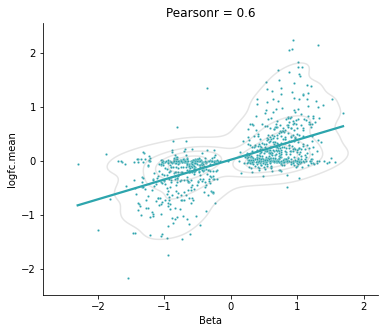

In [18]:
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

data = pd.DataFrame()
data["logfc.mean"] = micrs1["pred.chrombpnet.microglia.varscore.logfc"]
data["Beta"] = micrs1["obs.Beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=5, color="#2da5ad")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#2da5ad")
ax.spines[["top", "right"]].set_visible(False)

values = []

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
values.append(atc_pear[0])
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
values.append(atc_pear[0])

print(atc_pear)
#ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))
plt.savefig("subfigs/microglia_caqtls_scatter_plot.pdf", transparent=True, dpi=300)


In [19]:
data.shape

(877, 2)

In [13]:
import pandas as pd

df = pd.DataFrame()


values = []

atac_pear = scipy.stats.pearsonr(micrs1["pred.chrombpnet.microglia.varscore.logfc"],micrs1["obs.Beta"])
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(micrs1["pred.chrombpnet.microglia.varscore.jsd"],micrs1["obs.Beta"])
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(abs(micrs1["pred.chrombpnet.microglia.varscore.logfc"]),abs(micrs1["obs.Beta"]))
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(abs(micrs1["pred.chrombpnet.microglia.varscore.jsd"]),abs(micrs1["obs.Beta"]))
values.append(atac_pear[0])

df["pearsonr"] = values
df["method"] = ["logfc-signed", "jsd-signed",  "logfc-unsigned", "jsd-unsigned"]
df["dtype"] = ["ATAC"]*4

0    0.602748
1    0.602144
2    0.268934
3    0.258195
Name: pearsonr, dtype: float64


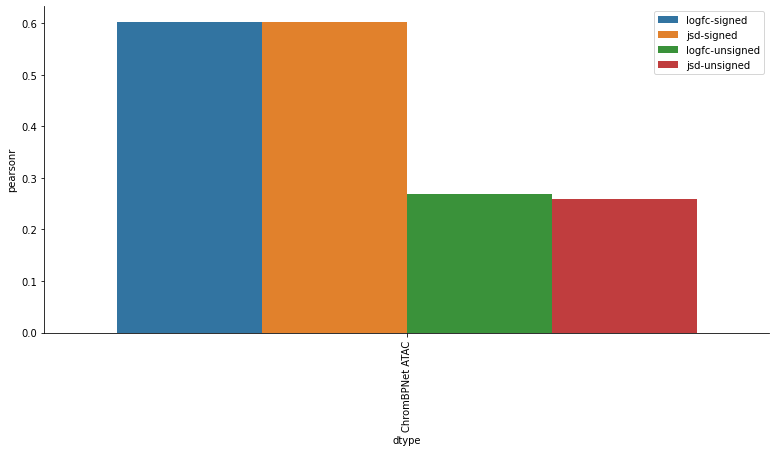

In [14]:
import seaborn as sns
import matplotlib
plt.figure(figsize=(13,6))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
print(df["pearsonr"])
ax = sns.barplot(data=df, x="dtype", y="pearsonr", hue="method")
xtix = ["ChromBPNet ATAC"]
ax.set_xticklabels(labels=xtix, rotation=90)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc="upper right")

plt.savefig("subfigs/microglia_caqtls_compare.pdf", transparent=True, dpi=300)


(0.2713813904520899, 9.07335852756754e-85)
(0.13150475156929783, 1.2028157383926722e-20)


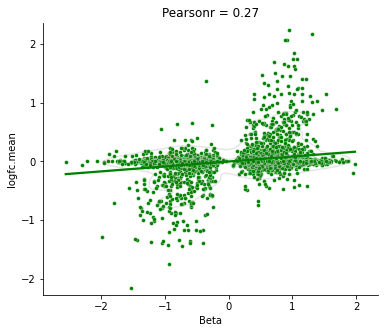

In [16]:
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

data = pd.DataFrame()
data["logfc.mean"] = micros["pred.chrombpnet.microglia.varscore.logfc"]
data["Beta"] = micros["obs.Beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=15, color="green")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="green")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
print(atc_pear)
#ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))


In [17]:
data.shape

(4978, 2)